# Analysis and modelling of the Carlifornia Housing dataset

### Analysis Areas
#### -Analyze the key areas of settlement in carlifornia
#### -Determine how the median income affects the median house value(RegPlot)
#### -Assess different features affect the meadian house value(O.P/total_rooms/total_bedrooms/Location/Population)
#### -Develop a machine learning model to determine the median price of households(LR)

<p style=color:red>Insights are at the bottom of the notebook</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

# Data loading

In [2]:
df=pd.read_csv("C:/Users/XXXX/Downloads/carlifornia_housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Metrics analysis

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


# Data Cleaning

In [4]:
round((df.isnull().sum()/df.shape[0])*100,2)

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        1.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [5]:
df3=df.dropna()

In [6]:
df3.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Data distribution

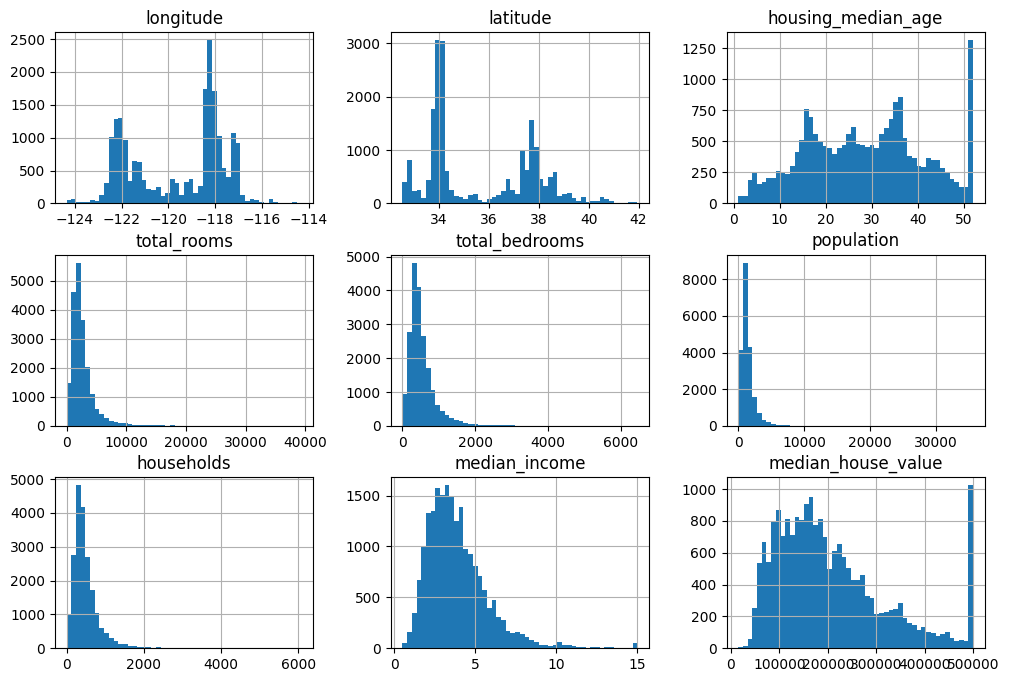

In [7]:
df3.hist(figsize=(12, 8), bins=50)
plt.show()

In [8]:
import seaborn as sns

### Correlation Matrix

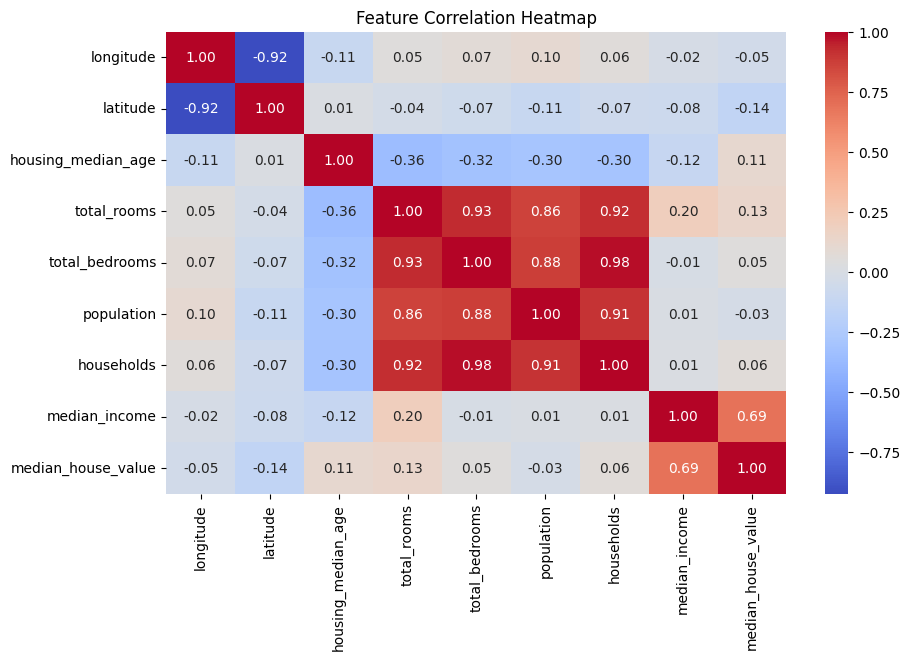

In [9]:
df_numeric=df3.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

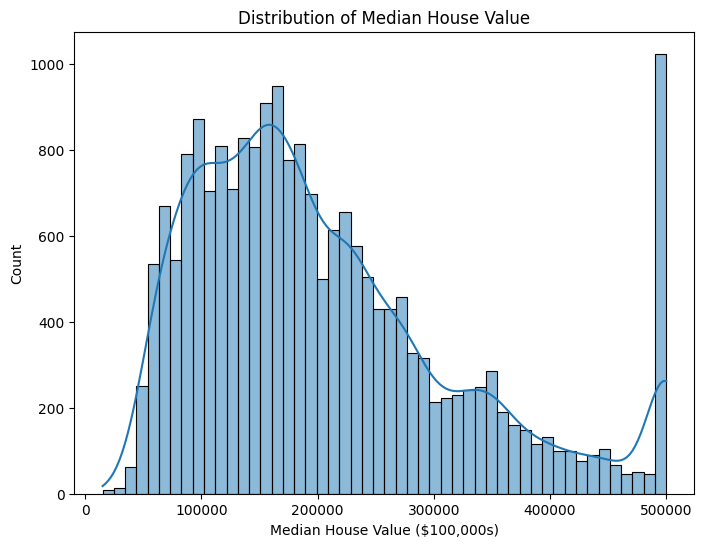

In [64]:
# Distribution of Target Variable (Median House Value)
plt.figure(figsize=(8, 6))
sns.histplot(df3['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value ($100,000s)")
plt.show()

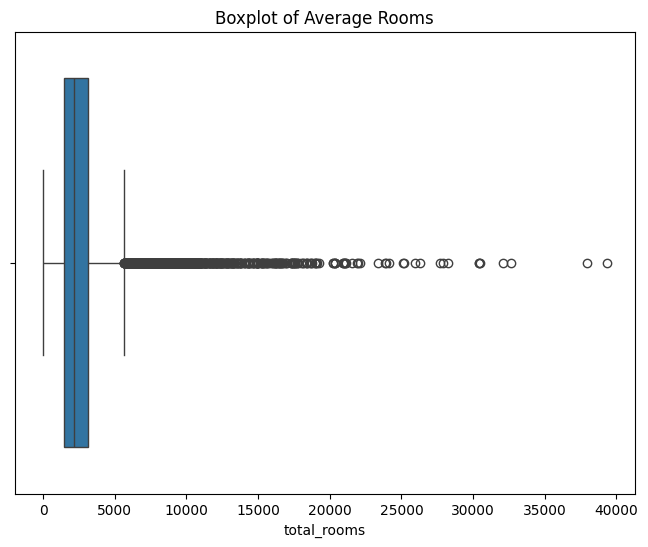

In [65]:
# Outlier Detection (example: AveRooms)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df3['total_rooms'])
plt.title("Boxplot of Average Rooms")
plt.show()

In [96]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="california_housing_analysis")

# Function to get location name from lat/lon
def get_location(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
        return location.address if location else "Unknown"
    except GeocoderTimedOut:
        return "Timeout"
    except Exception as e:
        return f"Error: {e}"

top_regions = (df.groupby(['latitude', 'longitude'])['median_house_value']
               .mean()
               .sort_values(ascending=False)
               .head(5)
               .reset_index())

# Add location names
top_regions['Location'] = top_regions.apply(
    lambda row: get_location(row['latitude'], row['longitude']), axis=1
)

## Most expensive places in carlifornia

In [84]:
# Display results
top_regions[['Location','median_house_value']]

,Location,median_house_value
0,"1235, Portland Avenue, Los Altos, Santa Clara ...",500001.0
1,"682, Ocampo Drive, Pacific Palisades, Los Ange...",500001.0
2,"579, North Mount Holyoke Avenue, Los Angeles, ...",500001.0
3,"Malibu Village Lane, Malibu Village, Los Angel...",500001.0
4,"Lunita Road, Malibu West, Malibu, Los Angeles ...",500001.0


## Least expensive places in carlifornia

In [89]:

bot_regions = (df.groupby(['latitude', 'longitude'])['median_house_value']
               .mean()
               .sort_values(ascending=True)
               .head(5)
               .reset_index())

# Add location names
bot_regions['Location'] = top_regions.apply(
    lambda row: get_location(row['latitude'], row['longitude']), axis=1
)

In [90]:
# Display results
bot_regions[['Location','median_house_value']]

,Location,median_house_value
0,"Bramlet Road, Trinity County, California, Unit...",14999.0
1,"Azusa Canyon OHV, San Gabriel Canyon Road, Los...",14999.0
2,"Inyo County, California, United States",14999.0
3,"Glenn County, California, United States",14999.0
4,"San Bernardino County, California, United States",22500.0


In [121]:
# Merge top and bottom regions with df to get median_income
#top_regions = top_regions.merge(df[['latitude', 'longitude', 'median_income']], on=['latitude', 'longitude'], how='left')
#bot_regions = bot_regions.merge(df[['latitude', 'longitude', 'median_income']], on=['latitude', 'longitude'], how='left')

In [114]:
# Display the data
top_regions.head()


,latitude,longitude,median_house_value,Location,Group,median_income_x,median_income_y,median_income,Category
0,37.36,-122.08,500001.0,"1235, Portland Avenue, Los Altos, Santa Clara ...",Top,9.2810,9.2810,9.2810,Most Expensive
1,37.36,-122.08,500001.0,"1235, Portland Avenue, Los Altos, Santa Clara ...",Top,9.2810,9.2810,8.2266,Most Expensive
2,37.36,-122.08,500001.0,"1235, Portland Avenue, Los Altos, Santa Clara ...",Top,9.2810,8.2266,9.2810,Most Expensive
3,37.36,-122.08,500001.0,"1235, Portland Avenue, Los Altos, Santa Clara ...",Top,9.2810,8.2266,8.2266,Most Expensive
4,37.36,-122.08,500001.0,"1235, Portland Avenue, Los Altos, Santa Clara ...",Top,8.2266,9.2810,9.2810,Most Expensive


In [115]:
bot_regions.head()

,latitude,longitude,median_house_value,Location,Group,median_income_x,median_income_y,median_income,Category
0,40.31,-123.17,14999.0,"Bramlet Road, Trinity County, California, Unit...",Bottom,0.5360,0.5360,0.5360,Least Expensive
1,34.24,-117.86,14999.0,"Azusa Canyon OHV, San Gabriel Canyon Road, Los...",Bottom,4.1932,4.1932,4.1932,Least Expensive
2,36.40,-117.02,14999.0,"Inyo County, California, United States",Bottom,2.1000,2.1000,2.1000,Least Expensive
3,39.71,-122.74,14999.0,"Glenn County, California, United States",Bottom,1.6607,1.6607,1.6607,Least Expensive
4,35.43,-116.57,22500.0,"San Bernardino County, California, United States",Bottom,2.7138,2.7138,2.7138,Least Expensive


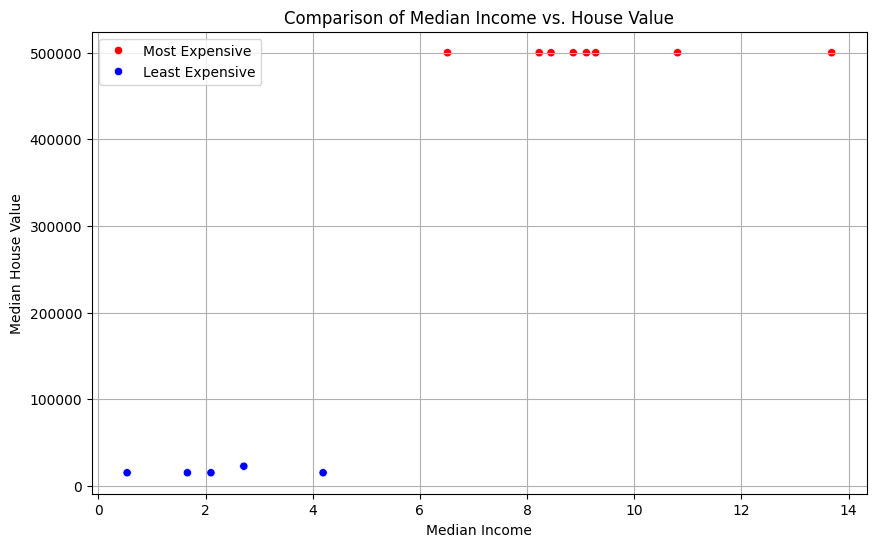

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine both datasets for comparison
top_regions['Category'] = 'Most Expensive'
bot_regions['Category'] = 'Least Expensive'
comparison_df = pd.concat([top_regions, bot_regions])

# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=comparison_df, x='median_income', y='median_house_value', hue='Category', palette=['red', 'blue'])

plt.title("Comparison of Median Income vs. House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.legend()
plt.show()


In [123]:
# Merge top and bottom regions with population data
top_regions = top_regions.merge(df3[['latitude', 'longitude', 'population']], on=['latitude', 'longitude'], how='left')
bot_regions = bot_regions.merge(df3[['latitude', 'longitude', 'population']], on=['latitude', 'longitude'], how='left')

# Display the merged data
print("Top Expensive Regions:\n", top_regions[['Location', 'population']])
print("\nLeast Expensive Regions:\n", bot_regions[['Location', 'population']])


Top Expensive Regions:
                                              Location  population
0   1235, Portland Avenue, Los Altos, Santa Clara ...      1001.0
1   1235, Portland Avenue, Los Altos, Santa Clara ...       728.0
2   1235, Portland Avenue, Los Altos, Santa Clara ...      1001.0
3   1235, Portland Avenue, Los Altos, Santa Clara ...       728.0
4   1235, Portland Avenue, Los Altos, Santa Clara ...      1001.0
..                                                ...         ...
95  682, Ocampo Drive, Pacific Palisades, Los Ange...       368.0
96  682, Ocampo Drive, Pacific Palisades, Los Ange...       761.0
97  579, North Mount Holyoke Avenue, Los Angeles, ...       735.0
98  Malibu Village Lane, Malibu Village, Los Angel...       617.0
99  Lunita Road, Malibu West, Malibu, Los Angeles ...      1509.0

[100 rows x 2 columns]

Least Expensive Regions:
                                             Location  population
0  Bramlet Road, Trinity County, California, Unit...        18.0
1  

In [124]:
# Total population in expensive vs. cheap areas
top_population = top_regions['population'].sum()
bot_population = bot_regions['population'].sum()

print(f"Total Population in Most Expensive Areas: {top_population}")
print(f"Total Population in Least Expensive Areas: {bot_population}")


Total Population in Most Expensive Areas: 69289.0
Total Population in Least Expensive Areas: 8056.0


C:\Users\XXXX\AppData\Local\Temp\ipykernel_11164\1827358859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pop_comparison, x='Category', y='Total Population', palette=['red', 'blue'])


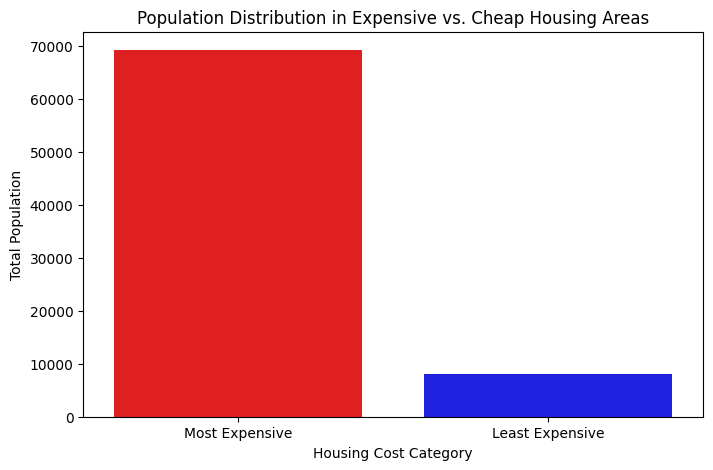

In [125]:
pop_comparison = pd.DataFrame({
    'Category': ['Most Expensive', 'Least Expensive'],
    'Total Population': [top_population, bot_population]
})

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=pop_comparison, x='Category', y='Total Population', palette=['red', 'blue'])

plt.title("Population Distribution in Expensive vs. Cheap Housing Areas")
plt.ylabel("Total Population")
plt.xlabel("Housing Cost Category")
plt.show()


### Featureselection

#### Multicolinearity:
#### -total rooms,total bedrooms and households all have strong colinearity (0.9), this might cause redudancy so I will create new features because they are still important to the model:
####             rooms_per_household =  households/total_rooms 
####             bedrooms_per_room =  total_rooms /total_bedrooms
####             pop_per_househoold=  households / population
#### -with -0.03 population will not be a relevant feature for this model


In [10]:
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Feature Engineering

In [11]:
df3["rooms_per_household"] = df3["total_rooms"] / df3["households"]  
df3["bedrooms_per_room"] = df3["total_bedrooms"] / df3["total_rooms"]  
df3["pop_per_household"] = df3["population"] / df3["households"]      

C:\Users\XXXX\AppData\Local\Temp\ipykernel_11164\3504427466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rooms_per_household"] = df3["total_rooms"] / df3["households"]
C:\Users\XXXX\AppData\Local\Temp\ipykernel_11164\3504427466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bedrooms_per_room"] = df3["total_bedrooms"] / df3["total_rooms"]
C:\Users\XXXX\AppData\Local\Temp\ipykernel_11164\3504427466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [12]:
df4=df3.copy()

In [13]:
df4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


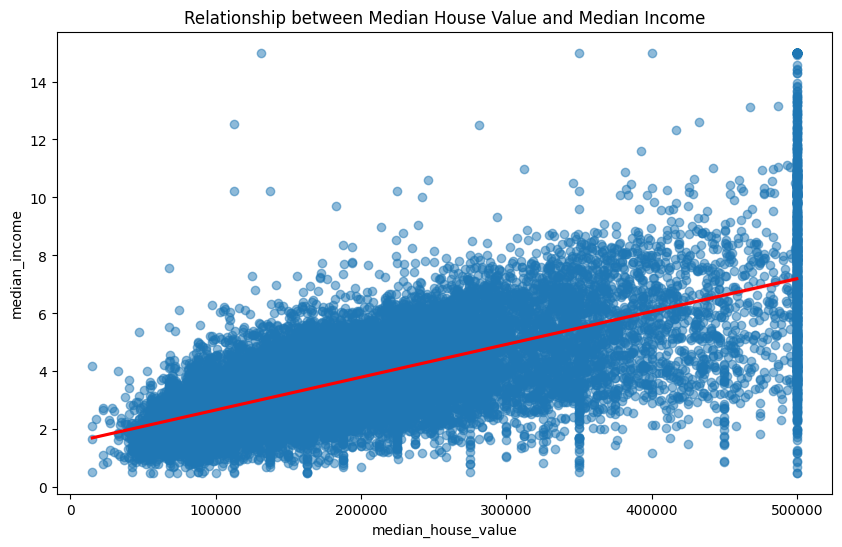

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='median_house_value', y='median_income', data=df4, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Median House Value and Median Income')
plt.show()

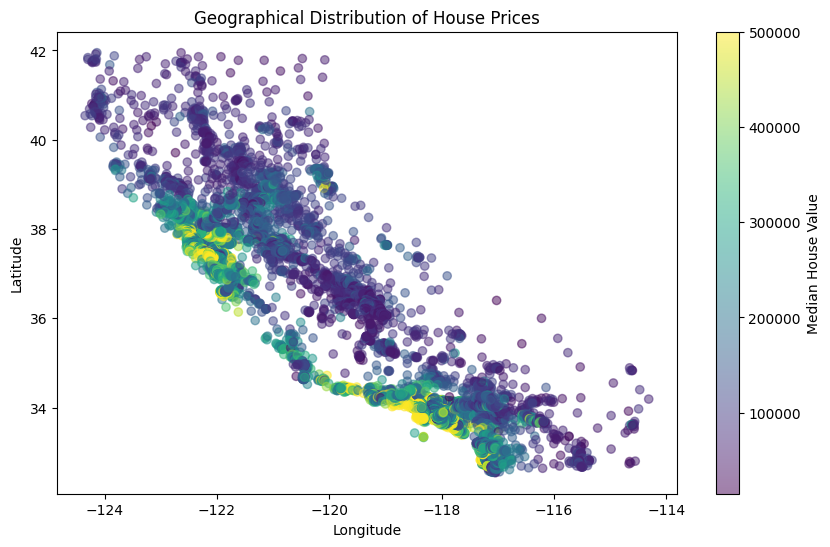

In [15]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df4["longitude"], df4["latitude"], c=df4["median_house_value"], cmap="viridis", alpha=0.5)
plt.colorbar(sc, label="Median House Value")
plt.title("Geographical Distribution of House Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



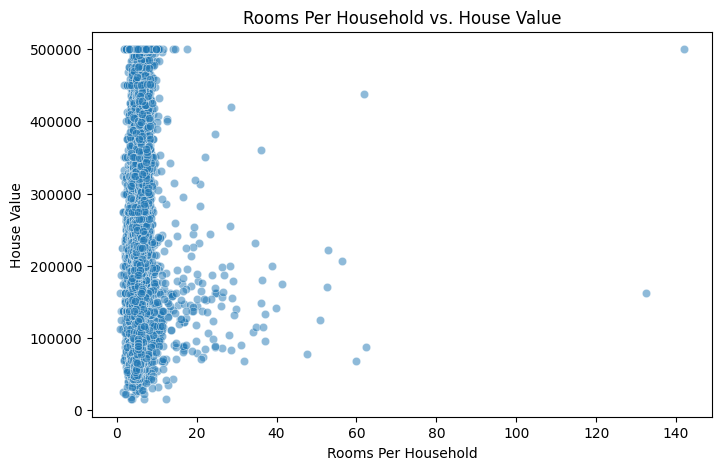

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df4["rooms_per_household"], y=df4["median_house_value"], alpha=0.5)
plt.title("Rooms Per Household vs. House Value")
plt.xlabel("Rooms Per Household")
plt.ylabel("House Value")
plt.show()

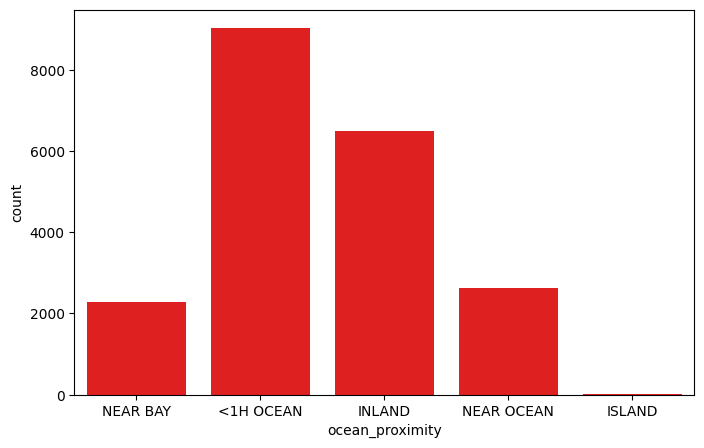

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='ocean_proximity',data=df4,color='red')
plt.show()

In [18]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd


geolocator = Nominatim(user_agent="geoapiExercises")


def get_location(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.address if location else "Unknown"
    except GeocoderTimedOut:
        return "Timeout"




# Apply function to create a new column
#housing["location"] = housing.apply(lambda row: get_location(row["latitude"], row["longitude"]), axis=1)

#print(housing)


In [19]:
df4['ocean_proximity']=df['ocean_proximity']

## Categorical value encoding

In [20]:
dummies_df=pd.get_dummies(df4.ocean_proximity)
bool_columns = dummies_df.select_dtypes(include='bool').columns
dummies_df[bool_columns] = dummies_df[bool_columns].astype(int)
dummies_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [21]:
df4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [22]:
df4=pd.concat([df4,dummies_df],axis=1)

In [23]:
dummies_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [24]:
final = df4.drop(['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'], axis='columns')

In [25]:
final.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556


In [26]:
final_x=pd.concat([final,dummies_df],axis=1)

In [27]:
final_x.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0,0,0,1,0


In [28]:
df6=final_x.drop(['longitude','latitude','pop_per_household','total_rooms','total_bedrooms','population','ocean_proximity','pop_per_household'], axis='columns')

In [29]:
df6.head()

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,126.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,52.0,177.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,52.0,219.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,52.0,259.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


In [30]:
df6.head(7)

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,126.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,52.0,177.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,52.0,219.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,52.0,259.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0
5,52.0,193.0,4.0368,269700.0,4.761658,0.231774,0,0,0,1,0
6,52.0,514.0,3.6591,299200.0,4.931907,0.192899,0,0,0,1,0


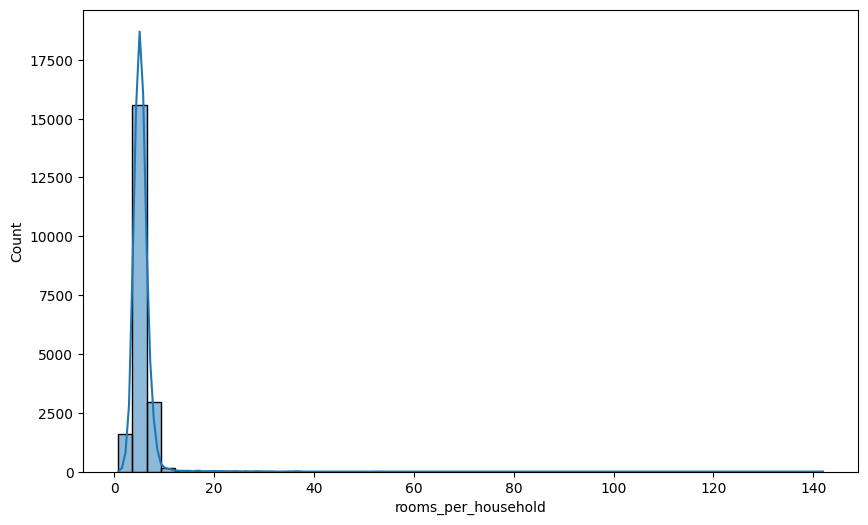

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(x=df6['rooms_per_household'],bins=50,kde=True)
plt.show()

### Descriptive statistics on the new variables

In [32]:
print("\nDescriptive Statistics for Room Metrics:")
print(df6[["rooms_per_household", "bedrooms_per_room"]].describe())


Descriptive Statistics for Room Metrics:
       rooms_per_household  bedrooms_per_room
count         20433.000000       20433.000000
mean              5.431344           0.213039
std               2.482946           0.057983
min               0.846154           0.100000
25%               4.441441           0.175427
50%               5.230769           0.203162
75%               6.052381           0.239821
max             141.909091           1.000000


In [33]:
Q1 = df6["rooms_per_household"].quantile(0.25)
Q3 = df6["rooms_per_household"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR


print(f"\nUpper bound for rooms_per_household: {upper_bound:.2f}")
print(f"\nlower bound for rooms_per_household: {lower_bound:.2f}")
print("Blocks with extreme rooms_per_household:")
print(df6[df6["rooms_per_household"] > upper_bound])


Upper bound for rooms_per_household: 8.47

lower bound for rooms_per_household: 3.64
Blocks with extreme rooms_per_household:
       housing_median_age  households  median_income  median_house_value  \
155                  52.0       258.0         8.8793            410300.0   
511                  42.0       335.0        13.4990            500001.0   
512                  52.0       352.0        12.2138            500001.0   
514                  52.0       383.0        12.3804            500001.0   
517                  52.0       179.0         8.7477            500001.0   
...                   ...         ...            ...                 ...   
20408                26.0       263.0         7.7889            309900.0   
20426                11.0       119.0        10.0472            500001.0   
20428                 6.0      1010.0         8.7288            425800.0   
20436                10.0       371.0        12.5420            500001.0   
20462                21.0       322.0

In [34]:
df7=df3.copy()

In [35]:
df7.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896


In [36]:
low, high = df7["rooms_per_household"].quantile([0.1, 0.9])
mask = df7["rooms_per_household"].between(low, high)

In [37]:
df7 = df7[mask]

In [38]:
df7.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,pop_per_household
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405


### Outlier Removal

In [39]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply outlier removal to rooms_per_household
df8 = remove_outliers_iqr(df6, "rooms_per_household")
print(df8.shape)  # Check new dataset size


(19925, 11)


In [40]:
df8.head()

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,126.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,52.0,177.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,52.0,219.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,52.0,259.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


In [41]:
df9=df8.copy()

In [42]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply to bedrooms_per_room
df11 = remove_outliers_iqr(df9, "bedrooms_per_room")
print(df11.shape)  # Check new dataset size


(19388, 11)


In [43]:
df11.head()

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,126.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,52.0,177.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,52.0,219.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,52.0,259.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


In [44]:
print(df11[["bedrooms_per_room"]].describe())

       bedrooms_per_room
count       19388.000000
mean            0.207987
std             0.044617
min             0.100000
25%             0.175307
50%             0.202165
75%             0.236326
max             0.336256


In [45]:
print(df11[["rooms_per_household"]].describe())

       rooms_per_household
count         19388.000000
mean              5.305037
std               1.096071
min               2.093750
25%               4.497788
50%               5.238348
75%               6.009050
max               8.467890


In [46]:
df11.head()

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,126.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,52.0,177.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,52.0,219.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,52.0,259.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


## Standadization

In [47]:
df13=df11.copy()

In [48]:
df13.head()

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,126.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,52.0,177.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,52.0,219.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,52.0,259.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


In [49]:
df13['pple_per_hshold']=df7['pop_per_household']

In [50]:
df14=df13.drop('pple_per_hshold',axis='columns')

In [51]:
df14.head()

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,126.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,21.0,1138.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,52.0,177.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,52.0,219.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,52.0,259.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


## Standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ["housing_median_age", "households", "median_income", 
                "rooms_per_household", "bedrooms_per_room"]  
one_hot_cols = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
target_col = "median_house_value"


scaler = StandardScaler()
df14[numeric_cols] = scaler.fit_transform(df14[numeric_cols])

X = df14[numeric_cols + one_hot_cols]  
y = df14[target_col]  

## Variable splits and Linear Regression Application

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

# Train
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training R^2 score:", lr.score(X_train, y_train))
print("Testing R^2 score:", lr.score(X_test, y_test))

X_train shape: (15510, 10)
Training R^2 score: 0.6314218922836436
Testing R^2 score: 0.6275974035466404


In [54]:
df13.tail()

,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,pple_per_hshold
20635,25.0,330.0,1.5603,78100.0,5.045455,0.224625,0,1,0,0,0,2.560606
20636,18.0,114.0,2.5568,77100.0,6.114035,0.215208,0,1,0,0,0,3.122807
20637,17.0,433.0,1.7000,92300.0,5.205543,0.215173,0,1,0,0,0,2.325635
20638,18.0,349.0,1.8672,84700.0,5.329513,0.219892,0,1,0,0,0,2.123209
20639,16.0,530.0,2.3886,89400.0,5.254717,0.221185,0,1,0,0,0,2.616981


## Testing

In [55]:
sample_input = np.array([[16.0,530.0, 2.3886, 5.254717,0.221185, 0, 1, 0, 0, 0]])


numeric_input = sample_input[:, :5]  
one_hot_input = sample_input[:, 5:]  


scaled_numeric = scaler.transform(numeric_input)


sample_input_scaled = np.hstack((scaled_numeric, one_hot_input))

predicted_price = lr.predict(sample_input_scaled)
print("Predicted Median House Value:", predicted_price[0])


Predicted Median House Value: 83667.5499387104


C:\Users\XXXX\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\XXXX\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Applying Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("RF Training R^2:", rf.score(X_train, y_train))
print("RF Testing R^2:", rf.score(X_test, y_test))

RF Training R^2: 0.9546648772040682
RF Testing R^2: 0.6718254748725536


In [57]:
#Random Forest is iverfitting

In [58]:
import pickle
with open('carlifornia.pickle','wb') as f:
    pickle.dump(lr,f)

In [59]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

<h2 style=color:green>Insights</h2>
<p>-Locations with high median income value have higher median housing value compared to households with lower median income</p>
<p>-There's more settlement in expensive housing locations that cheap locations (Total Population in Most Expensive Areas: 69289.0 /Total Population in Least Expensive Areas: 8056.0)</p>
<p>-Most settlement is observed in places less than one hour from the ocean and least settlement is around islands</p>
<p>-The value of the house increases with increase in no of bedrooms and the number rooms</p>